# 2-canyon run, Astoria base, highest N

## General description
Repeat of experiment July 30th using Splashtop (7 day free trial) instead of Teamviewer. Highest stratification.

## Notes:
Took base measurements of ANK readings throughout the spin ups. All probes connected at the same time and using calibration from May 2nd (most linear one)

## Stratification
New volume is 18 L  per bucket vs. 16 L from before.

1200 g salt bucket 1 (Started filling at 09:50, ended 11:30 )

$\rho_{b1}=1.04118$ g cm$^{-3}$ at 20.019  deg C at 09:55 

$\rho_{b2}=0.99894 $ g cm$^{-3}$ at 20.041  deg C 

## Rotation and forcing

|$f$| rad s$^{-1}$|$\Delta t$ /s|Description|
|::|::|::|::|
|$f_0$|0.50| - |background, spin up  |
|$f_1$|0.54|21|ramp up|
|$f_2$|0.58|50|avoid spin down|
|$f_2$ to $f_0$|-|15 min|ramp down to background $f$|


## Experiments
Started conduino, then waited 15 s to start table profile for upwelling runs. These time I took 10000 samples instead of the usual 3000.

''run01  (14:30)''
 

*  lightsheet 3-3.1 cm
*  Not enough particles
* 06_experiment1.mat, experiment1.mov

''run02 (15:59) ''

* lightsheet 2.5-2.6 cm
* Better particles but low density of particles.
* 09_experiment1.mat, experiment2.mov

''run03 (17:30)''

* lightsheet 4.5 cm
* Good particle density!
* 12_experiment3.mat, experiment3.mov

## Conduino
### Base measurement ANK probes
10000 samples

|time|file|
|:-:|:-:|
|12:31|01_base.mat|
|13:00|02_base.mat|
|13:30|03_base.mat|
|14:20|05_base.mat|
|15:19|07_base.mat|
|17:20|11_base.mat|

## Density samples

### run01 (13:40)

|Density/g cm$^{-3}$|Temperature/$^{\circ}$C|Depth/cm|
|::|::|::|
|1.01706|20.004| surface|
|1.02405|20.017|2.9 |
|1.03744|20.020|9.5|

### run02 (15:29)

|Density/g cm$^{-3}$|Temperature/$^{\circ}$C|Depth/cm|
|::|::|::|
|1.01775|20.024| surface|
|1.02349|20.047|2.9 |
|1.03791|20.039|9.5|

### run02 (17:00)

|Density/g cm$^{-3}$|Temperature/$^{\circ}$C|Depth/cm|
|::|::|::|
|1.01782|20.020| surface|
|1.02401|20.013|2.9 |
|1.03715|20.030|9.5|

## Profiler

*  13:45  - 04_profile.mat
*  17:00 - 10_profile.mat

In [1]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools


In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def plot_uprofile(ax, col='0.8'):
    ax.axvline(21.0, color=col, linestyle=':')
    ax.axvline(71.0, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### Forcing

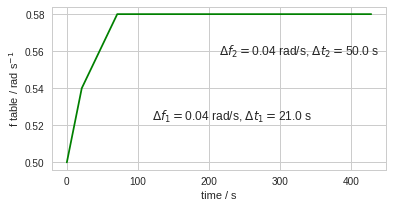

In [5]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0 = 0.50 # initial f rad/s
f1 = 0.54 # rad/s
f2 = 0.58 # rad/s
t0 = 21.0 # s
t1 = 71.0 # s
exp_file = '../experiments/exp_31jul19/06_experiment1.mat'

plot_forcing(ax0, exp_file, f0, f1, f2, t0, t1)

### All readings 

Text(0.5,0,'time / s')

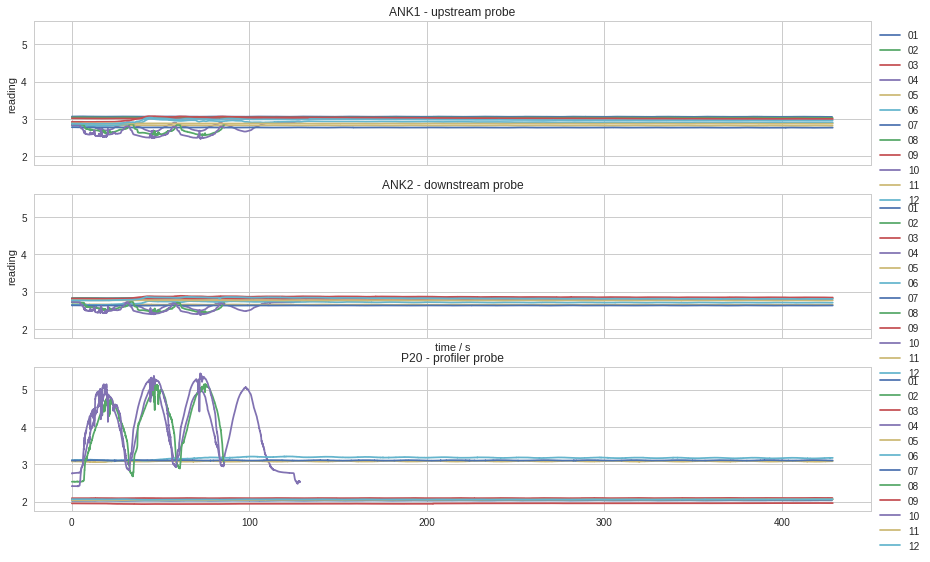

In [6]:
fig, (ax0,ax1, ax2) = plt.subplots(3,1, figsize=(15,9), sharex=True, sharey=True)

labels = [ '01','02','03','04','05','06','07','08','09','10','11','12']

filepaths = ['../experiments/exp_31jul19/01_base.mat',
             '../experiments/exp_31jul19/02_base.mat',
             '../experiments/exp_31jul19/03_base.mat',
             '../experiments/exp_31jul19/04_profile.mat',
             '../experiments/exp_31jul19/05_base.mat',
             '../experiments/exp_31jul19/06_experiment1.mat',
             '../experiments/exp_31jul19/07_base.mat',
             '../experiments/exp_31jul19/08_profile.mat',
             '../experiments/exp_31jul19/09_experiment2.mat',
             '../experiments/exp_31jul19/10_profile.mat',
             '../experiments/exp_31jul19/11_base.mat',
             '../experiments/exp_31jul19/12_experiment3.mat',
            ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')

ax1.set_xlabel('time / s')

### Base readings

3.05923242 2.82194304
3.0349527099999998 2.81513498
3.0078872600000004 2.80841656
2.8232874199999998 2.6491125999999996
2.7676596300000003 2.6264963000000003
2.87393657 2.76423603


Text(0.5,0,'time / s')

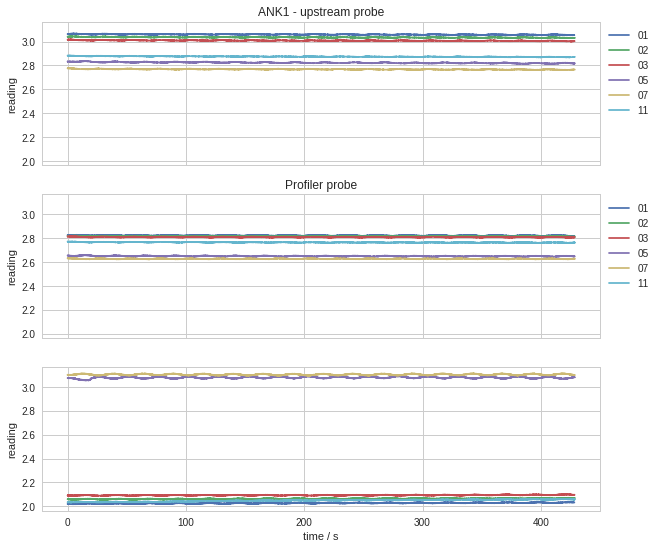

In [7]:
fig, (ax0,ax1, ax2) = plt.subplots(3,1, figsize=(10,9), sharex=True, sharey=True)

labels = [ '01','02','03','05','07','11']

filepaths = ['../experiments/exp_31jul19/01_base.mat',
             '../experiments/exp_31jul19/02_base.mat',
             '../experiments/exp_31jul19/03_base.mat',
             '../experiments/exp_31jul19/05_base.mat',
             '../experiments/exp_31jul19/07_base.mat',
             '../experiments/exp_31jul19/11_base.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)
    print(np.mean(P1), np.mean(P2))
    
 
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax1.set_title('Profiler probe')
ax2.set_xlabel('time / s')


Text(0.5,0,'time / s')

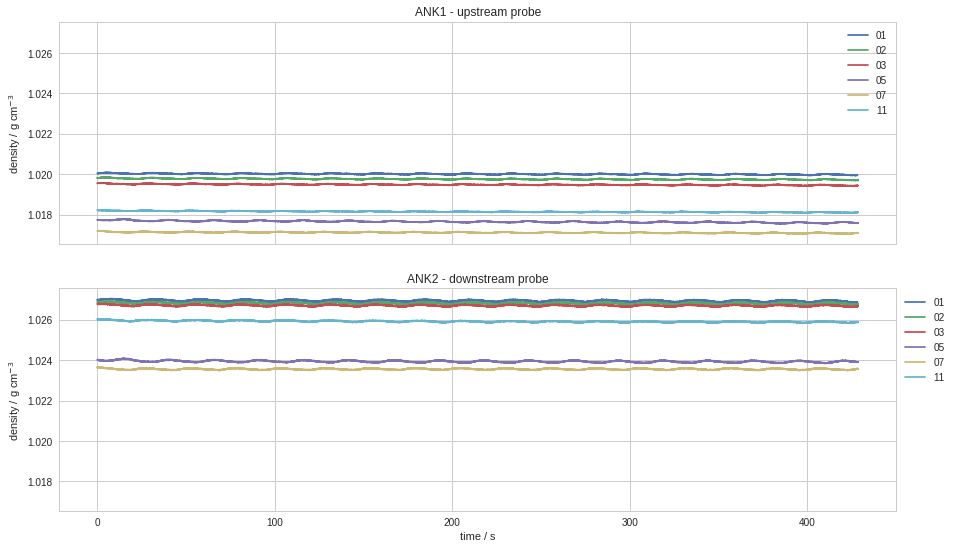

In [8]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,9), sharex=True, sharey=True)

labels = ['01','02','03','05','07','11']

filepaths = ['../experiments/exp_31jul19/01_base.mat',
             '../experiments/exp_31jul19/02_base.mat',
             '../experiments/exp_31jul19/03_base.mat',
             '../experiments/exp_31jul19/05_base.mat',
             '../experiments/exp_31jul19/07_base.mat',
             '../experiments/exp_31jul19/11_base.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_02May19(P1), label=lab)
    ax1.plot(time,ctools.densANK2_02May19(P2), label=lab)
 
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax1.set_xlabel('time / s')

### Profiles

Text(0.5,0,'time / s')

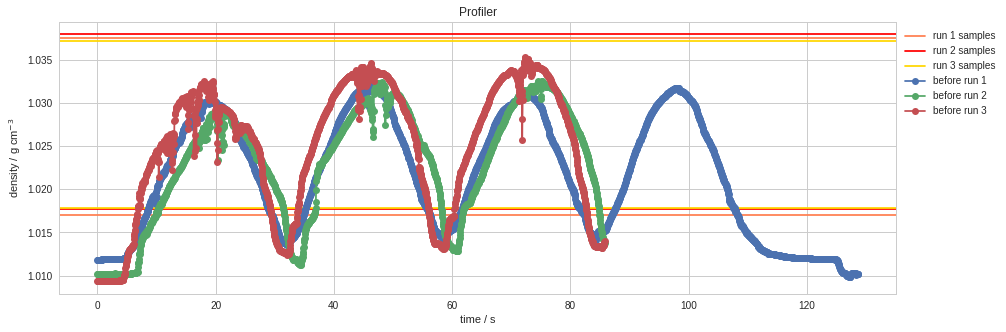

In [9]:
fig, (ax0) = plt.subplots(1,1, figsize=(15,5), sharex=True)
labels=['before run 1', 'before run 2', 'before run 3']

ax0.axhline(1.01706,color='coral', label='run 1 samples')
ax0.axhline(1.03744,color='coral')
ax0.axhline(1.01775,color='red', label='run 2 samples')
ax0.axhline(1.03791,color='red')
ax0.axhline(1.01782,color='gold', label='run 3 samples')
ax0.axhline(1.03715,color='gold')

filepaths = ['../experiments/exp_31jul19/04_profile.mat',
             '../experiments/exp_31jul19/08_profile.mat',
             '../experiments/exp_31jul19/10_profile.mat',
            ]
ind_offset = [0,0,0]
for filepath, lab, ind in zip(filepaths, labels, ind_offset):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']# dens_B(mat['ch1'])
    time = mat['time']
    densP3 = ctools.densP_02May19(P3)
    ax0.plot(time[ind:]-time[ind],densP3[ind:],'o-', label=lab)

ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('Profiler')
ax0.set_xlabel('time / s')


### Experiment

../experiments/exp_31jul19/06_experiment1.mat
../experiments/exp_31jul19/09_experiment2.mat
../experiments/exp_31jul19/12_experiment3.mat


Text(0.5,0,'sample')

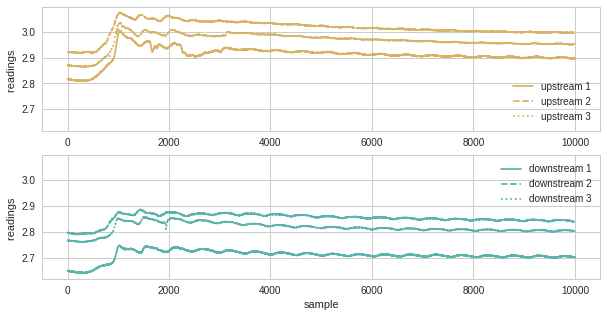

In [10]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],['upstream 3', 'downstream 3']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_31jul19/06_experiment1.mat',
         '../experiments/exp_31jul19/09_experiment2.mat',
         '../experiments/exp_31jul19/12_experiment3.mat',
   ]
for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(P1,'-', label=lab[0], color=colors[0], linestyle=sty)
    ax1.plot(P2,'-', label=lab[1], color=colors[1], linestyle=sty)
ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax1.set_ylabel('readings ')
ax1.set_xlabel('sample')

../experiments/exp_31jul19/06_experiment1.mat
../experiments/exp_31jul19/09_experiment2.mat
../experiments/exp_31jul19/12_experiment3.mat


Text(0.5,1,'Probe density')

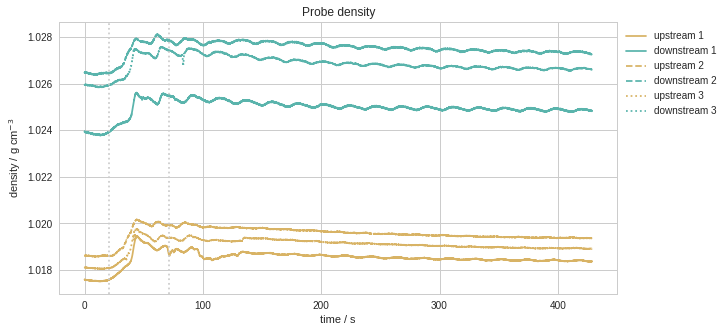

In [11]:
fig, ax0 = plt.subplots(1,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],['upstream 3', 'downstream 3']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_31jul19/06_experiment1.mat',
         '../experiments/exp_31jul19/09_experiment2.mat',
         '../experiments/exp_31jul19/12_experiment3.mat',
        ]

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_02May19(P1),'-', label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,ctools.densANK2_02May19(P2),'-', label=lab[1], color=colors[1], linestyle=sty)

plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


../experiments/exp_31jul19/06_experiment1.mat
../experiments/exp_31jul19/09_experiment2.mat
../experiments/exp_31jul19/12_experiment3.mat


Text(0.5,1,'Probe density minus initial density')

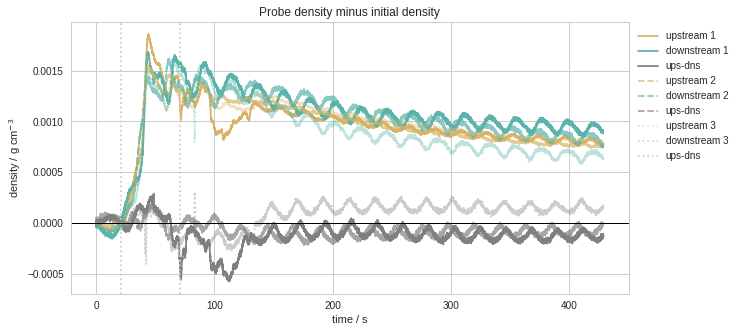

In [12]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],['upstream 3', 'downstream 3']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
alphas = [1,0.7,0.4]
files = ['../experiments/exp_31jul19/06_experiment1.mat',
         '../experiments/exp_31jul19/09_experiment2.mat',
         '../experiments/exp_31jul19/12_experiment3.mat',
         ]

for filepath, lab, sty, alpha in zip(files, labels, linestyles, alphas):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_02May19(P1)-ctools.densANK1_02May19(P1)[0],'-', 
             label=lab[0], color=colors[0], linestyle=sty, alpha=alpha)
    ax0.plot(time,ctools.densANK2_02May19(P2)-ctools.densANK2_02May19(P2)[0],'-', 
             label=lab[1], color=colors[1], linestyle=sty, alpha=alpha)
    ax0.plot(time,((ctools.densANK1_02May19(P1)-ctools.densANK1_02May19(P1)[0])-
                   (ctools.densANK2_02May19(P2)-ctools.densANK2_02May19(P2)[0])),
             '-', label='ups-dns',linestyle=sty, color='0.5', alpha=alpha)

plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


In [13]:
g=9.81
rho_0=998

# N above sb run1
np.sqrt((g/rho_0)*(1024.05-1017.06)/0.029)

1.5392487939125352

In [14]:
# N above sb run2
np.sqrt((g/rho_0)*(1023.49-1017.75) /0.029)


1.3948457396970344

In [15]:
# N above sb run3
np.sqrt((g/rho_0)*(1024.01-1017.82)/0.029) 

1.4484901911558208